In [5]:
data<-read.csv("./german/germancredit.csv")

In [6]:
data$amount<-as.double(data$amount5)

In [7]:
data$amount<-as.factor(ifelse(data$amount5<=2500,'0-2500',ifelse(data$amount5<=5000,'2600-5000','5000+')))

In [8]:
d = sort(sample(nrow(data), nrow(data)*.6))

In [9]:
train <- data[d,]
test<- data[-d,]

In [10]:
period_onset <- as.Date(c("2014-07-02", "2014-08-02", "2014-08-29", "2014-09-25",
                          "2014-10-24", "2014-11-20", "2014-12-22", "2015-01-19"))
days_between_periods <- as.numeric(diff(period_onset))

In [11]:
m <- glm(~.,data=train,family=binomial())

ERROR: Error in family$linkfun(mustart): Argument mu must be a nonempty numeric vector


In [12]:
data<-read.csv("./ts_dataset/gdp", sep="")

In [32]:
# example(xts)

In [78]:
# example(as.Date)

In [93]:
ts = xts(data[,7:9], order.by=as.yearmon(data$YEAR))

In [85]:
vignette("zoo")

In [34]:
xts(ts)

ERROR: Error in xts(ts): order.by requires an appropriate time-based object


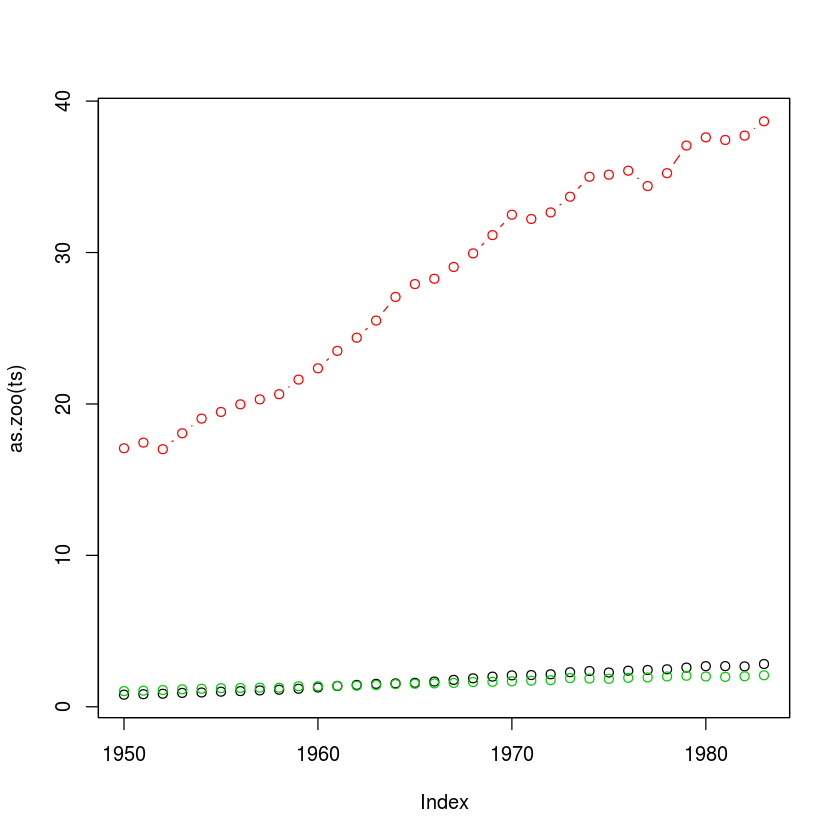

In [124]:
plot(as.zoo(ts),screens=1, type="b", col=c(1,2,3))

In [99]:
library(forecast)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 6.2 



In [107]:
mf = meanf(ts[1,],h=3, level=c(90,95), fan=FALSE, lambda=NULL)

In [109]:
mn = naive(ts[1,],h=3, level=c(90,95), fan=FALSE, lambda=NULL)

In [115]:
md = rwf(ts[1,], h=3, drift=F, level=c(90, 95), fan=FALSE, lambda=NULL)

In [114]:
?rwf

rwf {forecast},R Documentation
x,a numeric vector or time series
h,Number of periods for forecasting
drift,"Logical flag. If TRUE, fits a random walk with drift model."
level,Confidence levels for prediction intervals.
fan,"If TRUE, level is set to seq(51,99,by=3). This is suitable for fan plots."
lambda,"Box-Cox transformation parameter. Ignored if NULL. Otherwise, forecasts back-transformed via an inverse Box-Cox transformation."
model,A list containing information about the fitted model
method,The name of the forecasting method as a character string
mean,Point forecasts as a time series
lower,Lower limits for prediction intervals


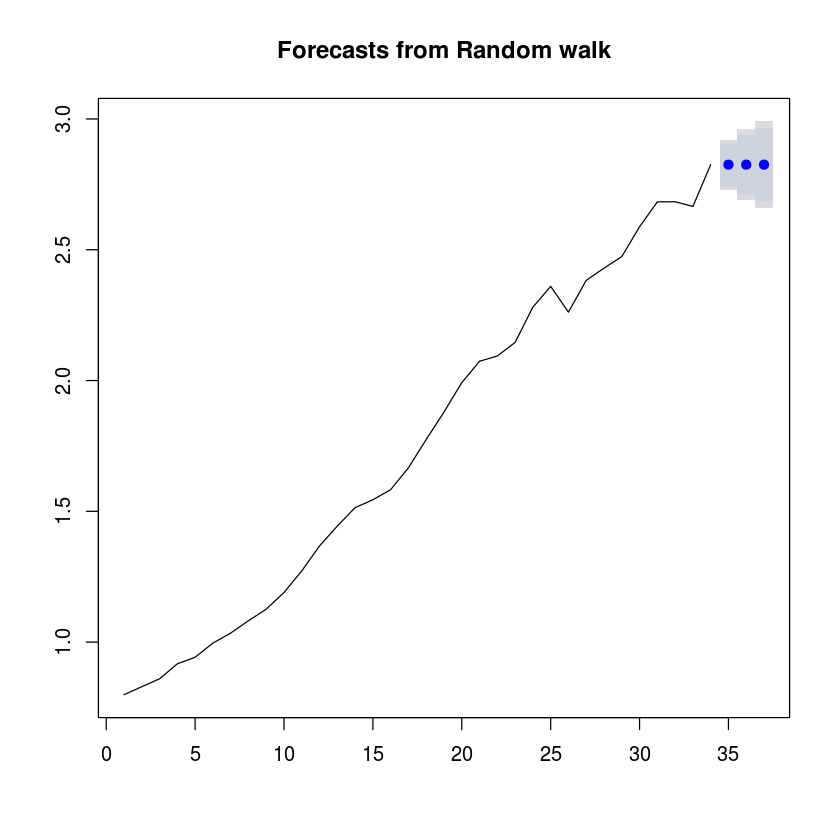

In [116]:
plot(md)

In [100]:
?meanf

meanf {forecast},R Documentation
x,a numeric vector or time series
h,Number of periods for forecasting
level,Confidence levels for prediction intervals.
fan,"If TRUE, level is set to seq(51,99,by=3). This is suitable for fan plots."
lambda,"Box-Cox transformation parameter. Ignored if NULL. Otherwise, forecasts back-transformed via an inverse Box-Cox transformation."
model,A list containing information about the fitted model
method,The name of the forecasting method as a character string
mean,Point forecasts as a time series
lower,Lower limits for prediction intervals
upper,Upper limits for prediction intervals
